In [557]:
import seaborn as sns
import numpy as np
from statsmodels.stats.gof import gof_binning_discrete
import matplotlib.pyplot as plt
import math

### Generating a sample from Poisson distribution

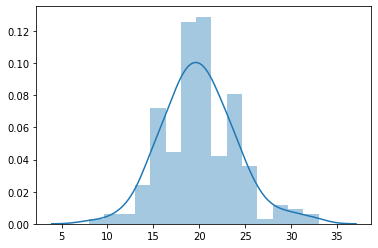

In [558]:
mu = 20

pois = stats.poisson.rvs(mu = mu, size = 200)
sns.distplot(pois, hist=True)
plt.show()



#### Testing the hypothesis that the parameter is equal to a given value using chi-squered test

In [559]:
from scipy import stats

f_obs, f_exp, histsupp = gof_binning_discrete(pois, stats.poisson, (mu, ))

chi, p = stats.chisquare(f_obs, f_exp)
print(chi, p)
if p>= 0.05:
    print('Test passed ')
else:
    print('Test failed')


10.970357572505998 0.6133009622396255
Test passed 


In [560]:
mu_2 = 10
f_obs, f_exp, histsupp = gof_binning_discrete(pois, stats.poisson, (mu_2, ))

chi, p = stats.chisquare(f_obs, f_exp)
print(chi, p)
if p>= 0.05:
    print('Test passed ')
else:
    print('Test failed')


4766.635709997711 0.0
Test failed


### Constructing the prior distribution (gamma) from this sample

First, we have to find parameters for gamma distribution.


In [561]:
from scipy.stats import gamma

$$E(\theta) = \frac{\alpha_0}{\beta_0}$$ <br/>   $$var(\theta) = \frac{\alpha_0}{\beta_0^2}$$

In [562]:
var_pois = np.var(pois)
mean_pois = np.mean(pois)
mean_pois, var_pois

(19.955, 16.442975)

$$\alpha_0 = \frac{(E(\theta))^2}{var(\theta)}$$ <br/>   $$\beta_0 = \frac{\alpha_0}{E(\theta)}$$

In [563]:
alpha = (mean_pois)**2/var_pois

In [564]:
beta = alpha/mean_pois

In [565]:
(alpha-1)/beta

19.130997243798543

In [566]:
alpha, beta

(24.217152005643744, 1.2135881736729515)

In [567]:
shape = alpha
scale = 1/beta
shape, scale

(24.217152005643744, 0.8240027562014534)

In [568]:
gam = gamma.rvs(a = shape, scale = scale, size = 200)

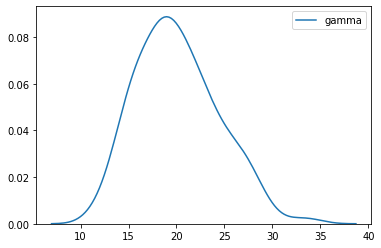

In [569]:
sns.distplot(gam, hist=False, label='gamma')
plt.show()

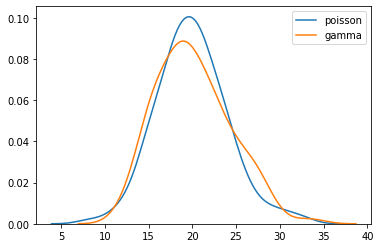

In [570]:
sns.distplot(pois, hist=False, label='poisson')
sns.distplot(gam, hist=False, label='gamma')


plt.show()

In [571]:
mu_2 = 20
size_2 = 150
pois_2 = np.random.poisson(mu_2, size = size_2)

### Constructing the likelihood function and finding the MLE of the parameter 

$$L(\theta|y) \equiv \prod_{i=1}^n p(y_i|\theta)=\prod_{i=1}^n (\theta^{y_i}/y_i!) e^{-n\theta}\propto \theta^{n\bar{y}}e^{-n\theta} $$ 

$$ ln(L(\theta|y)) = \bar{y}n ln\theta - n\theta $$

$$ \frac{dln(L(\theta|y))}{d\theta} = \frac{\bar{y}n}{\theta} - n = 0$$

So, MLE $$\hat{\theta} = \bar{y} $$

In [572]:
#likelihood = np.prod(stats.poisson.pmf(pois, mu))

In [573]:
theta = sum(pois)/200
theta

19.955

### Constructing the posterior distribution

$$p(\theta|y) \propto e^{-n\theta} \prod_{i=1}^n (\theta^{y_i}/y_i!) \frac{\beta_0^{\alpha_0}}{Г(\alpha_0)} \theta^{\alpha_0-1}e^{-\beta_0 \theta} \propto \theta^{(\sum(y_i)+\alpha_0)-1}e^{-(n+\beta_0)\theta}$$

So, it's gamma distribution with $$ \bar{\alpha} = \sum{y_i} + \alpha_0$$ <br/> $$ \bar{\beta} = n + \beta_0$$

In [574]:
alpha_2 = sum(pois) + alpha
beta_2 =200 + beta

alpha_2, beta_2

(4015.2171520056436, 201.21358817367295)

MLE $$\hat{\theta} = \bar{y} =19.96 $$ and max of prior $$ \hat{\theta_{M0}} = \frac{\alpha_0-1}{\beta_0}= 19.1 $$

$$\hat{\theta_M} = \frac{\bar{\alpha}-1}{\bar{\beta}} $$

In [575]:
theta_M = (alpha_2-1)/beta_2
theta_M

19.950030156715176

$$\hat{\theta_M} = 19.95$$

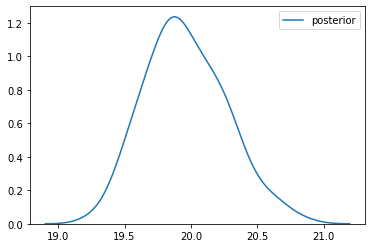

In [576]:
posterior = gamma.rvs(a = alpha_2, scale = 1/beta_2, size = 200)

sns.distplot(posterior, hist=False, label='posterior')
plt.show()


### Constructing a histogram of the posterior

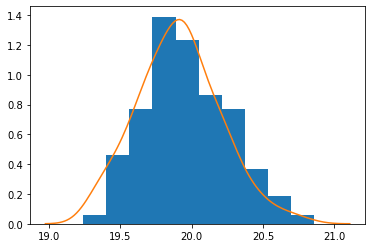

In [644]:
nmu = alpha_2/beta_2
ns = (math.sqrt(alpha_2))/beta_2
s = stats.norm.rvs(nmu, ns, 200)

plt.hist(posterior, density = True)
sns.distplot(s, hist=False)

In [632]:
posterior_sample = np.random.choice(a= posterior, size = 80)   

In [633]:
posterior_sample

array([20.45488997, 20.12615258, 19.73802068, 19.79513977, 20.23937718,
       20.16700062, 19.65187102, 20.15603331, 19.86642998, 20.49740729,
       20.15249068, 20.22813225, 19.58861608, 20.10548543, 20.31391132,
       20.08310677, 19.87690817, 19.73891012, 19.9879194 , 19.68722862,
       19.9175482 , 20.01226714, 19.93131645, 20.45113594, 20.19104958,
       20.04681232, 20.14356961, 20.3799482 , 19.80312587, 19.83100279,
       20.08310677, 19.82537613, 19.65187102, 19.60205454, 19.85044595,
       19.51574235, 19.9832951 , 20.08310677, 20.3799482 , 20.38940762,
       19.60505295, 19.42807938, 20.2261753 , 19.9278895 , 19.92162373,
       19.86498297, 20.25191291, 20.14356961, 19.59002622, 19.99028022,
       19.5905864 , 20.25191291, 20.65236882, 19.94755854, 19.24037897,
       20.45488997, 20.08310677, 20.48782266, 19.42760634, 20.23127187,
       19.94755854, 19.84907269, 19.68722862, 20.03125859, 19.8386494 ,
       20.1297312 , 20.2535302 , 20.22027152, 19.68522083, 19.76

### Generating a sample from posterior

In [634]:
posterior

array([19.98856991, 20.02747669, 19.82309917, 19.50711455, 19.73802914,
       19.94947871, 20.07296966, 20.04249965, 19.63903991, 19.73374381,
       19.63851399, 19.55347285, 20.34234342, 19.59002622, 20.40393327,
       19.83794549, 19.84796559, 20.53062019, 19.91581583, 19.85889276,
       20.12427295, 20.48782266, 19.50432285, 20.41516417, 19.98270557,
       19.8386494 , 20.2535302 , 19.95923006, 19.9175482 , 19.99614227,
       20.2436758 , 19.8448574 , 19.40770534, 20.2876882 , 20.15249068,
       20.08141193, 19.43231457, 19.6415025 , 19.45786661, 19.68522083,
       20.14356961, 19.85044595, 20.31391132, 19.9062927 , 20.27855269,
       19.73807456, 19.80654842, 20.25191291, 19.73616793, 20.26394617,
       20.3980119 , 19.70565138, 20.25568424, 20.27568969, 19.99028022,
       20.30430022, 20.08310677, 19.5905864 , 19.94529253, 20.04169922,
       19.92370221, 20.19104958, 20.23937718, 19.86642998, 20.11544116,
       19.86074824, 19.58937641, 20.07883539, 20.65236882, 19.68

### Finding theoretical and sample posterior mean, median, variance, and st. deviation of the parameter

In [646]:
posterior_mean, sample_mean = np.mean(posterior), np.mean(posterior_sample)
print("posterior_mean, sample_mean:",posterior_mean, sample_mean)

posterior_mean, sample_mean: 19.960962636306025 20.00922447668205


(19.960962636306025, 20.00922447668205)

In [648]:
posterior_median, sample_median = np.median(posterior), np.median(posterior_sample)
print("posterior_median, sample_median:",posterior_median, sample_median)

posterior_median, sample_median: 19.92266297086024 20.01987191556283


In [649]:
posterior_var, sample_var = np.var(posterior), np.var(posterior_sample)
print("posterior_var, sample_var:", posterior_var, sample_var)

posterior_var, sample_var: 0.09260162439872191 0.08915877022232907


In [650]:
posterior_std, sample_std = np.std(posterior), np.std(posterior_sample)
print("posterior_std, sample_std:", posterior_std, sample_std)

posterior_std, sample_std: 0.3043051501350608 0.2985946587304084


### Plotting the confidence interval and Bayesian (credible) interval for the parameter mean.

$$ \bar{X} \pm z_{\alpha/2} \frac{s}{\sqrt{n}} $$ <br/> for 95% $$ z_{\alpha/2} = 1.96$$

In [639]:
confidence_interval = sample_mean - 1.96*(posterior_std)/(math.sqrt(80)), sample_mean + 1.96*(posterior_std)/(math.sqrt(80))
print("Confidence interval:")
print(confidence_interval)

Confidence interval:
(19.942540670524732, 20.075908282839368)


In [640]:
intervals = []
sample_means = []

for sample in range(30):
    sample = np.random.choice(a= posterior, size = 80)
    sample_mean_1 = sample.mean()
    sample_means.append(sample_mean_1)

  

    confidence_interval = ( sample_mean_1 - 1.96*(posterior_std)/(math.sqrt(80)), 
                           sample_mean_1 + 1.96*(posterior_std)/(math.sqrt(80)))  
    
    intervals.append(confidence_interval)

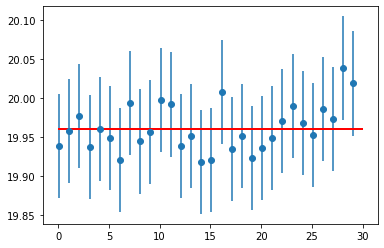

In [641]:
plt.errorbar(x=np.arange(0.1, 30, 1), y=sample_means, yerr=[(top-bot)/2 for top,bot in intervals], fmt='o')
plt.hlines(xmin=0, xmax=30, y=posterior_mean, linewidth=2.0, color="red");

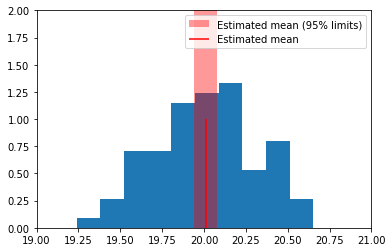

In [642]:
mean_b, var_b, std_b = stats.bayes_mvs(posterior_sample, alpha=0.95)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(posterior_sample, bins=10, density=True)
ax.vlines(mean_b.statistic, 0, 1, colors='r', label='Estimated mean')
ax.axvspan(mean_b.minmax[0],mean_b.minmax[1], 0, 1, facecolor='r',
           alpha=0.4, label=r'Estimated mean (95% limits)')


ax.legend(fontsize=10)
ax.set_xlim([19, 21])
ax.set_ylim([0, 2])
plt.show()

In [643]:
mean

Mean(statistic=19.960962636306025, minmax=(19.925314525614642, 19.99661074699741))